In [17]:
from scipy.stats import norm
import scipy.stats as stats
import random
from matplotlib import pyplot as plt
import numpy as np
import math

In [7]:
draws = [random.randint(1, 4) for _ in range(1000)]
    

In [9]:
norms = norm.rvs(0, 1, size=1000)


In [11]:
Xs = [draws[i] * 3 + norms[i] for i in range(1000)]


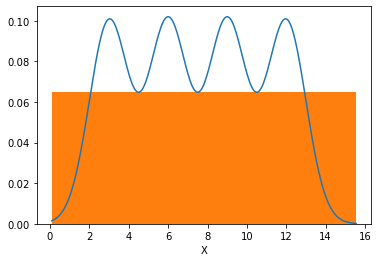

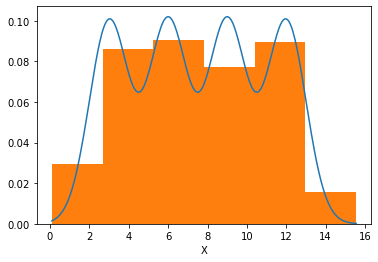

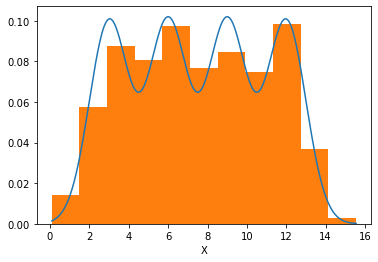

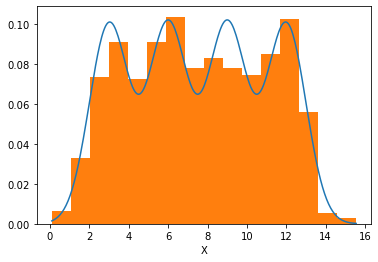

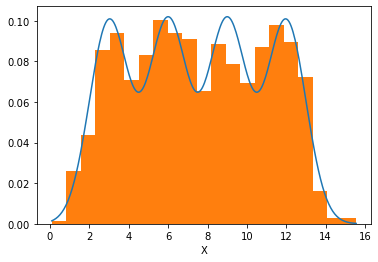

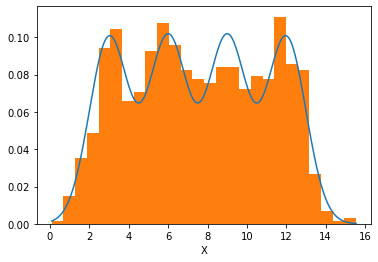

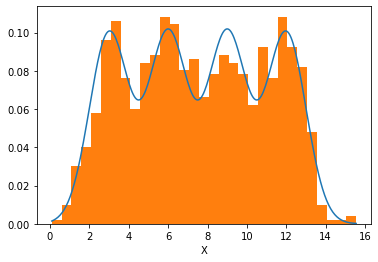

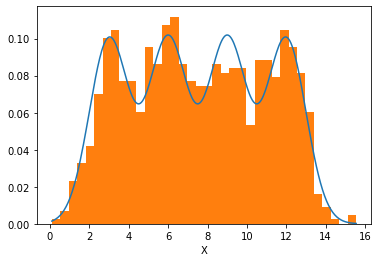

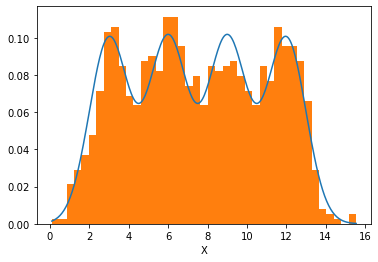

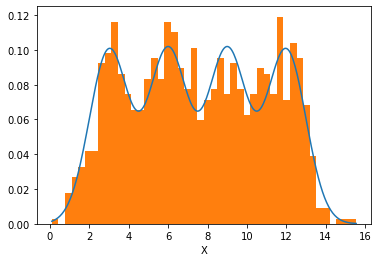

In [46]:
a = min(Xs)
b = max(Xs)
Ms = [1 + i * 5 for i in range(10)]
lin = np.linspace(a, b, 300)
f = lambda x: .25*sum([(1/math.sqrt(2*np.pi))*np.exp(-.5*(x - 3*k)**2) for k in range(1, 5)])
for m in Ms:
    plt.plot(lin, f(lin), label='pdf')
    plt.hist(Xs, density=True, bins=m)  # density=False would make counts
    plt.xlabel('X')
    plt.show()

In [44]:
FHat = lambda x, y: (1/len(x))*sum([1 for xi in x if y > xi])
Q_i = lambda x, i: min([xi for xi in x if i/4 <= FHat(x, xi)])
binwidth = lambda x: 2 * (Q_i(x, 3)-Q_i(x, 1)) / (len(x)**(1/3))
lin = np.linspace(0, 16, 1000)
print(binwidth(Xs))

1.1896407007758742


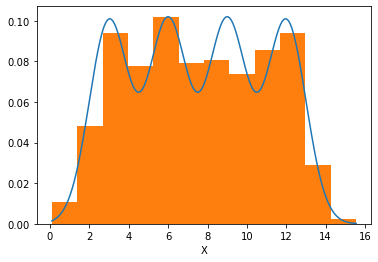

In [48]:
h = binwidth(Xs)
plt.plot(lin, f(lin), label='pdf')
plt.hist(Xs, density=True, bins=int(abs(a-b)/h))  # density=False would make counts
plt.xlabel('X')
plt.show()

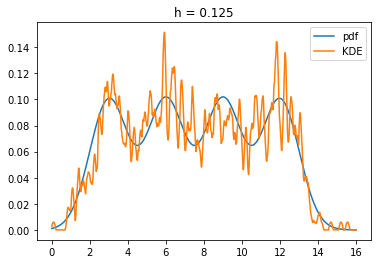

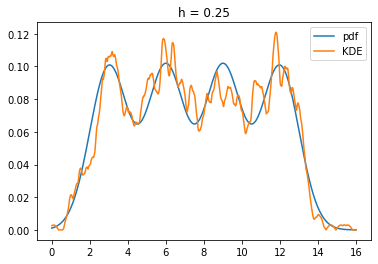

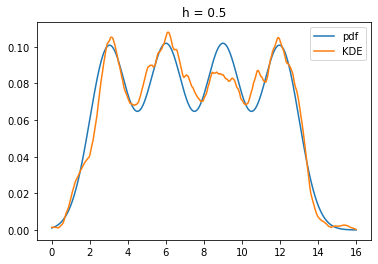

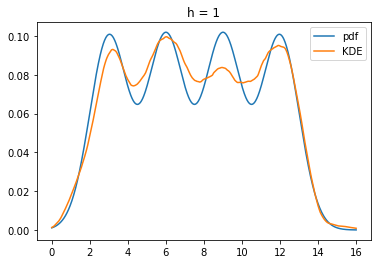

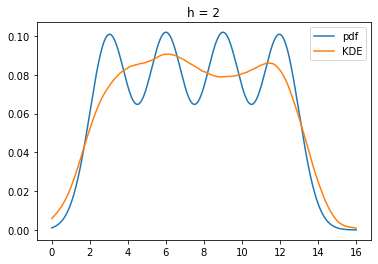

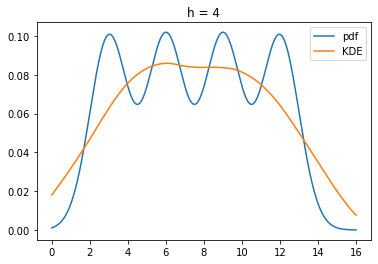

In [67]:
Hs = [2**i for i in range(-3, 3)]
K = lambda xi: .75*(1-xi**2)*(xi >= -1 and xi <= 1)
KDE = lambda x, Sample, h: (1/(len(Sample)*h))*sum([K((x-xi)/h) for xi in Sample])
lin = np.linspace(0, 16, 1000)

for h in Hs:
    plt.plot(lin, f(lin), label='pdf')
    plt.plot(lin, [KDE(x, Xs, h) for x in lin], label='KDE')
    plt.title('h = ' + str(h))
    plt.legend()
    plt.show()

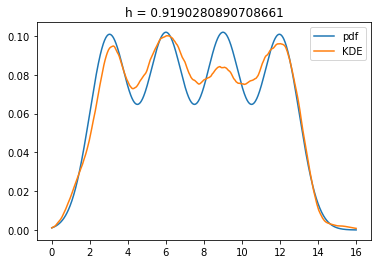

In [69]:
import statistics

stdDev = statistics.pstdev(Xs)
h = 1.059*stdDev*len(Xs)**(-.2)
plt.plot(lin, f(lin), label='pdf')
plt.plot(lin, [KDE(x, Xs, h) for x in lin], label='KDE')
plt.title('h = ' + str(h))
plt.legend()
plt.show()

1.0


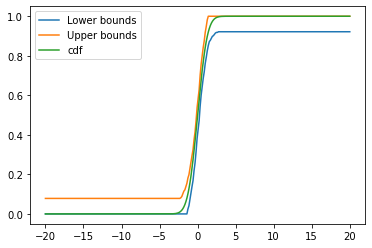

In [104]:
# 4.22
x = norm.rvs(0, 1, size=300)
lin = np.linspace(-20, 20, 300)
e_n = lambda n, a: ((1/(2*n))*np.log(2/a))**.5
L = lambda y: max([FHat(x, y) - e_n(len(x), 0.05), 0])
U = lambda y: min([FHat(x, y) + e_n(len(x), 0.05), 1])
true_cdf = lambda y: norm.cdf(y, 0, 1)
L_bounds = [L(xi) for xi in lin]
U_bounds = [U(xi) for xi in lin]
pct_in_bounds = sum([1 for i, xi in enumerate(lin) 
                    if true_cdf(xi) >= L_bounds[i] and true_cdf(xi) <= U_bounds[i]]) / 300
print(pct_in_bounds)
plt.plot(lin, L_bounds, label='Lower bounds')
plt.plot(lin, U_bounds, label='Upper bounds')
plt.plot(lin, [true_cdf(xi) for xi in lin], label='cdf')
plt.legend()
plt.show()

In [122]:
count = 0
for _ in range(100):
    x = norm.rvs(0, 1, size=300)
    L = lambda y: max([FHat(x, y) - e_n(len(x), 0.05), 0])
    U = lambda y: min([FHat(x, y) + e_n(len(x), 0.05), 1])
    L_bounds = [L(xi) for xi in lin]
    U_bounds = [U(xi) for xi in lin]
    in_bounds = len([1 for i, xi in enumerate(lin) 
                    if true_cdf(xi) >= L_bounds[i] and true_cdf(xi) <= U_bounds[i]]) == 300
    if in_bounds:
        count += 1
print(count/100)

0.97


In [125]:
count = 0
cauchy = lambda x: stats.cauchy.cdf(x)
for _ in range(100):
    x = stats.cauchy.rvs(0, 1, size=300)
    L = lambda y: max([FHat(x, y) - e_n(len(x), 0.05), 0])
    U = lambda y: min([FHat(x, y) + e_n(len(x), 0.05), 1])
    L_bounds = [L(xi) for xi in lin]
    U_bounds = [U(xi) for xi in lin]
    in_bounds = len([1 for i, xi in enumerate(lin) 
                    if cauchy(xi) >= L_bounds[i] and cauchy(xi) <= U_bounds[i]]) == 300
    if in_bounds:
        count += 1
print(count/100)

0.97
